<a href="https://colab.research.google.com/github/lcjln/Kaggle_HousePrice/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name = fn, length = len(uploaded[fn])))

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions list

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                               2025-11-03 23:59:00  Featured         1,000,000 Usd        657           False  
https://www.kaggle.com/competitions/google-gemma-3n-hackathon                    2025-08-06 23:59:00  Featured           150,000 Usd          0           False  
https://www.kaggle.com/competitions/make-data-count-finding-data-references      2025-09-09 23:59:00  Research           100,000 Usd        607           False  
https://www.kaggle.com/competitions/map-charting-student-math-misunderstandings  2025-10-15 23:59:00  Featured            55,000 Usd        242           False  
https://www.kaggle.com/compe

In [5]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques

In [6]:
#Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.shape

(1460, 81)

In [9]:
test.shape

(1459, 80)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÍ∏∞

OverallQual, OverallCond -> ÏÑ§Î¨∏Ï°∞ÏÇ¨Ïùò Ï£ºÍ¥ÄÏ†ÅÏù∏ Ìé∏Ìñ•ÏÑ±Ïù¥ ÎìúÎü¨ÎÇ† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå

In [12]:
train.drop(train[(train['OverallQual']<4) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallCond']<4) & (train['SalePrice']>200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
print(train.shape)

(1458, 81)


Ï¢ÖÏÜç Î≥ÄÏàò Î°úÍ∑∏ Î≥ÄÌôò

The value of mu before log transformation is: 180761.24142661178
The value of sigma before log transformation is: 79270.93617295024


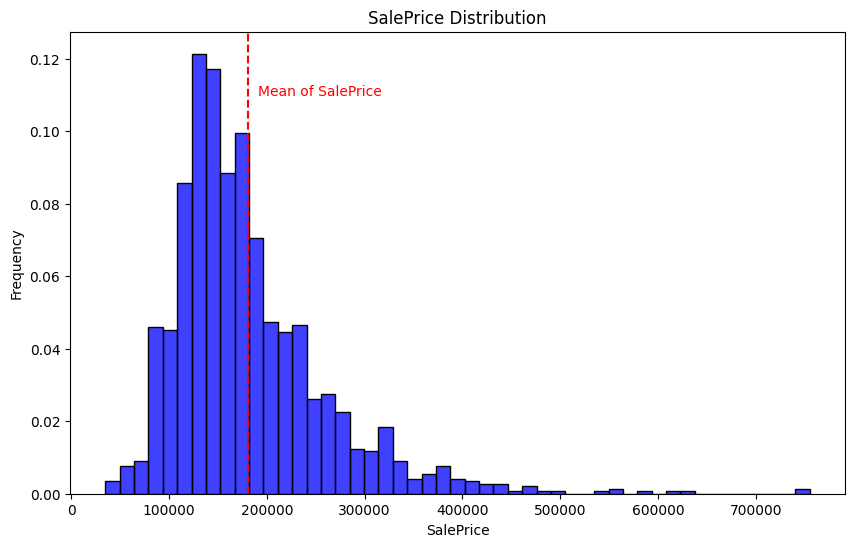

In [13]:
(mu, sigma) = stats.norm.fit(train['SalePrice']) #MLEÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌèâÍ∑†(mu)ÏôÄ ÌëúÏ§ÄÌé∏Ï∞®(sigma)Î•º Íµ¨Ìï®
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color = 'b', stat = "probability") # yÏ∂ïÏùÄ Ï†àÎåìÍ∞íÏù¥ ÏïÑÎãå ÎπÑÏú®Î°ú ÌëúÌòÑ
ax.xaxis.grid(False) #ÎààÍ∏àÏÑ† Ï†úÍ±∞
ax.set(ylabel = 'Frequency')
ax.set(xlabel = 'SalePrice')
ax.set(title = 'SalePrice Distribution')
plt.axvline(mu, color = 'r', linestyle = '--') # ÌèâÍ∑†Ïóê ÏàòÏßÅÏÑ†(axvline) ÏÉùÏÑ±
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation = 0, color = 'r') #ÌèâÍ∑† ÏàòÏßÅÏÑ† Ïò§Î•∏Ï™Ω(+10000)Ïóê 'Mean of SalePrice' ÌÖçÏä§Ìä∏ ÌëúÏãú , 0.11ÏùÄ yÏ¢åÌëú
fig.show()

ÏùºÎ∞òÏ†ÅÏù∏ ÌöåÍ∑Ä Î∂ÑÏÑùÏùÄ Ï†ïÍ∑ú Î∂ÑÌè¨Î•º ÎßåÏ°±Ìï¥Ïïº ÌïúÎã§

The value of mu after log transformation is: 12.0233397799989
The value of sigma after log transformation is: 0.3989191793099824


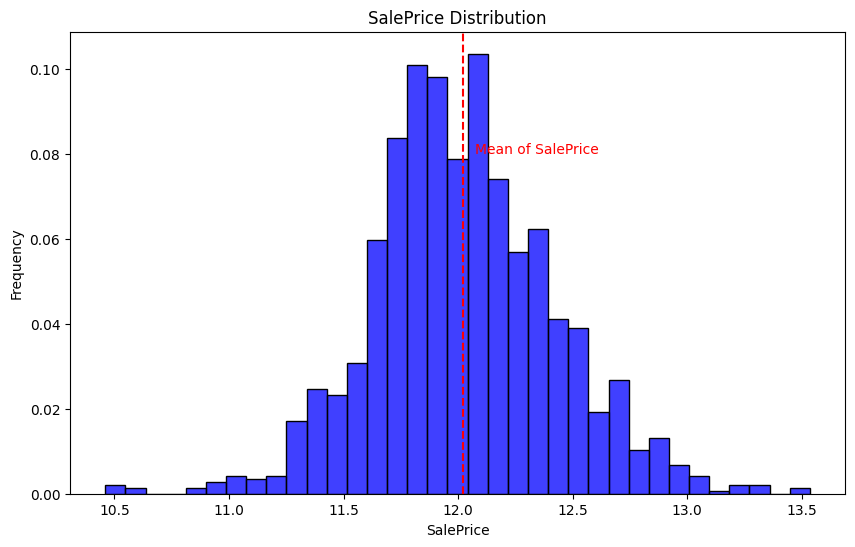

In [14]:
train['SalePrice'] = np.log1p(train['SalePrice']) # Î°úÍ∑∏Î≥ÄÌôò np.logÎ≥¥Îã§ np.log1pÍ∞Ä Îçî Ï†ïÌôïÌï® (np.log = ln(x) // np.log1p = ln(1+x))

(mu, sigma) = stats.norm.fit(train['SalePrice']) #MLEÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌèâÍ∑†(mu)ÏôÄ ÌëúÏ§ÄÌé∏Ï∞®(sigma)Î•º Íµ¨Ìï®
print("The value of mu after log transformation is:", mu)
print("The value of sigma after log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color = 'b', stat = "probability") # yÏ∂ïÏùÄ Ï†àÎåìÍ∞íÏù¥ ÏïÑÎãå ÎπÑÏú®Î°ú ÌëúÌòÑ
ax.xaxis.grid(False) #ÎààÍ∏àÏÑ† Ï†úÍ±∞
ax.set(ylabel = 'Frequency')
ax.set(xlabel = 'SalePrice')
ax.set(title = 'SalePrice Distribution')

plt.axvline(mu, color = 'r', linestyle = '--') # ÌèâÍ∑†Ïóê ÏàòÏßÅÏÑ†(axvline) ÏÉùÏÑ±
plt.text(mu+0.05, 0.08, 'Mean of SalePrice', rotation = 0, color = 'r') #ÌèâÍ∑† ÏàòÏßÅÏÑ† Ïò§Î•∏Ï™Ω(+10000)Ïóê 'Mean of SalePrice' ÌÖçÏä§Ìä∏ ÌëúÏãú
fig.show()

# Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [15]:
train_ID = train['Id'] #ÏûÖÎ†• Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©Ìï† IDÎäî Î≥ÑÎèÑÏùò Í∞ùÏ≤¥Î°ú Ï†ÄÏû•
test_ID = test['Id']
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)
train.shape, test.shape

((1458, 80), (1459, 79))

In [16]:
y = train['SalePrice'].reset_index(drop = True) # y Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©Ìï† SalePriceÎäî Î≥ÑÎèÑÏùò Í∞ùÏ≤¥Ïóê Ï†ÄÏû•
train = train.drop(['SalePrice'], axis = 1)
train.shape, test.shape # Ïù¥Ï†ú Î≥ÄÏàòÏùò Í∞úÏàòÍ∞Ä ÎèôÏùºÌï®ÏùÑ Ïïå Ïàò ÏûàÏùå

((1458, 79), (1459, 79))

In [17]:
all_df = pd.concat([train,test]).reset_index(drop=True)
all_df.shape

(2917, 79)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ÌïòÍ∏∞

In [18]:
#Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥ ÎπÑÏú®Î°ú Í≥ÑÏÇ∞Ìïú Îí§ ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®Ïàò
def check_na(data, head_num = 6):
    isnull_na=(data.isnull().sum()/len(data))*100 # Îç∞Ïù¥ÌÑ∞ Î≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
    data_na = isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending = False) # Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Îäî Ï∂úÎ†•ÎêòÏßÄ ÏïäÍ≤å ÌïòÍ≥† Í≤∞Ï∏°Ïπò ÎπÑÏú®ÏùÑ ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨
    missing_data = pd.DataFrame({'Missing Ratio' : data_na,
                                 'Data Type' : data.dtypes[data_na.index]}) # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
    print("Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüΩÍ≥º Í±¥Ïàò:\n", missing_data.head(head_num))

In [19]:
check_na(all_df,20) # Í≤∞Ï∏°Ïπò ÎπÑÏú®ÏùÑ ÌôïÏù∏ÌïòÍ≥† ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ 7Í∞ú Î≥ÄÏàòÎ•º Ï†úÍ±∞

Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüΩÍ≥º Í±¥Ïàò:
               Missing Ratio Data Type
PoolQC            99.657182    object
MiscFeature       96.400411    object
Alley             93.212204    object
Fence             80.425094    object
MasVnrType        60.507371    object
FireplaceQu       48.680151    object
LotFrontage       16.626671   float64
GarageQual         5.450806    object
GarageYrBlt        5.450806   float64
GarageCond         5.450806    object
GarageFinish       5.450806    object
GarageType         5.382242    object
BsmtExposure       2.811107    object
BsmtCond           2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
BsmtFullBath       0.068564   float64


In [20]:
all_df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis = 1, inplace = True)
check_na(all_df, 20)

Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüΩÍ≥º Í±¥Ïàò:
               Missing Ratio Data Type
GarageFinish       5.450806    object
GarageCond         5.450806    object
GarageQual         5.450806    object
GarageYrBlt        5.450806   float64
GarageType         5.382242    object
BsmtExposure       2.811107    object
BsmtCond           2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
BsmtHalfBath       0.068564   float64
BsmtFullBath       0.068564   float64
Utilities          0.068564    object
Functional         0.068564    object
BsmtFinSF1         0.034282   float64
Exterior1st        0.034282    object
Exterior2nd        0.034282    object
KitchenQual        0.034282    object


Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ - Î¨∏ÏûêÏó¥

In [21]:
#Î≥∏ Î∂ÑÏÑùÏóêÏÑú Î¨∏ÏûêÏó¥ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Îäî ÎπàÎèÑÏàò Ï§ë Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Ï±ÑÏõå ÎÑ£ÎäîÎã§
cat = list(all_df.select_dtypes(exclude = [np.number]))
print("The whole number of all_vars:", len(list(cat)))

for i in cat:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

The whole number of all_vars: 37


In [22]:
check_na(all_df, 20)

Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüΩÍ≥º Í±¥Ïàò:
               Missing Ratio Data Type
GarageYrBlt        5.450806   float64
MasVnrArea         0.754200   float64
BsmtHalfBath       0.068564   float64
BsmtFullBath       0.068564   float64
BsmtFinSF1         0.034282   float64
BsmtFinSF2         0.034282   float64
TotalBsmtSF        0.034282   float64
BsmtUnfSF          0.034282   float64
GarageCars         0.034282   float64
GarageArea         0.034282   float64


Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ - Ïà´ÏûêÌòï

In [23]:
#Î≥∏ Î∂ÑÏÑùÏóêÏÑú Ïà´ÏûêÏó¥ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Îäî Ï§ëÍ∞ÑÍ∞íÏúºÎ°ú Ï±ÑÏõå ÎÑ£ÎäîÎã§
num = list(all_df.select_dtypes(include = [np.number]))
print("The whole number of num:", len(num))

for i in num:
    all_df[i].fillna(all_df[i].median(), inplace=True)

check_na(all_df,20)

The whole number of num: 35
Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüΩÍ≥º Í±¥Ïàò:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


/tmp/ipython-input-23-1691019106.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df[i].fillna(all_df[i].median(), inplace=True)


# ÏôúÎèÑ Í∞í Ï≤òÎ¶¨

In [24]:
#ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùò ÏôúÎèÑÎ•º Ï†ÑÎ∂Ä Íµ¨Ìï¥ÏÑú ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎäî Ìï®Ïàò
def find_skew(x):
    return stats.skew(x)

skew_features = all_df[num].apply(find_skew).sort_values(ascending = False)
skew_features

MiscVal          21.939672
PoolArea         16.892477
LotArea          12.867139
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.318923
BsmtFinSF2        4.144503
EnclosedPorch     4.013741
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.615714
OpenPorchSF       2.534326
WoodDeckSF        1.841876
1stFlrSF          1.469798
BsmtFinSF1        1.429239
MSSubClass        1.374726
GrLivArea         1.271773
TotalBsmtSF       1.165468
BsmtUnfSF         0.919795
2ndFlrSF          0.860643
TotRmsAbvGrd      0.760404
Fireplaces        0.734449
HalfBath          0.695072
BsmtFullBath      0.626733
OverallCond       0.584601
BedroomAbvGr      0.329555
GarageArea        0.241611
OverallQual       0.196514
MoSold            0.195229
FullBath          0.164226
YrSold            0.132129
GarageCars       -0.218309
GarageYrBlt      -0.398311
YearRemodAdd     -0.451063
YearBuilt        -0.600023
dtype: float64

/tmp/ipython-input-25-4030632981.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0, all_numeric_df.max().sort_values(ascending = False)[0]) # all_numeric_dfÏùò Î≥ÄÏàò Í∞íÏ§ë Í∞ÄÏû• ÌÅ∞ Í≤ÉÎì§Îßå ÎÇ®Í∏∞Í≥† Í∑∏ Í∞íÎì§ÏùÑ ÎÇ¥Î¶ºÏ∞®ÏàúÌï¥ÏÑú Í∑∏ Ï§ë Ï≤´ Î≤àÏß∏ Í∞í


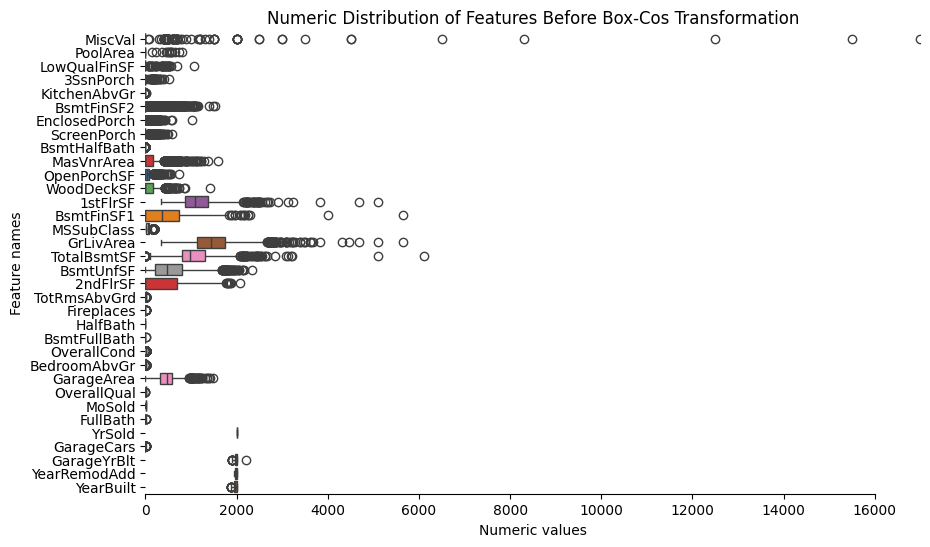

In [25]:
skewness_index=list(skew_features.index)
skewness_index.remove('LotArea') # Î≥ÄÏàò LotAreaÏùò Í∞íÏù¥ Îß§Ïö∞ Ïª§ÏÑú Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò ÎπÑÎåÄÏπ≠ Î∂ÑÌè¨ÎèÑÎ•º Ï†úÎåÄÎ°ú ÌôïÏù∏ÌïòÍ∏∞ Ïñ¥Î†§Ïõå Ï†úÍ±∞
all_numeric_df = all_df.loc[:,skewness_index]

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending = False)[0]) # all_numeric_dfÏùò Î≥ÄÏàò Í∞íÏ§ë Í∞ÄÏû• ÌÅ∞ Í≤ÉÎì§Îßå ÎÇ®Í∏∞Í≥† Í∑∏ Í∞íÎì§ÏùÑ ÎÇ¥Î¶ºÏ∞®ÏàúÌï¥ÏÑú Í∑∏ Ï§ë Ï≤´ Î≤àÏß∏ Í∞í
ax=sns.boxplot(data=all_numeric_df[skewness_index], orient='h', palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features Before Box-Cos Transformation')
sns.despine(trim=True, left=True)

ÏãúÍ∞ÅÌôî Í≤∞Í≥º, ÏôúÎèÑÍ∞Ä ÎÜíÏïÑ Ïù¥Îì§ÏùÑ Î∞îÎ°ú ÏûÖÎ†• Î≥ÄÏàòÎ°ú ÌôúÏö©ÌïòÎ©¥ ÏÑ†Ìòï ÌöåÍ∑Ä ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑú ÏûÖÎ†•Í∞íÏù¥ ÏôúÍ≥°Îê† Ïàò ÏûàÏùå

Ïù¥Îì§Ïùò ÏôúÎèÑÎ•º ÌäπÏ†ï Í∏∞Î≤ïÏùÑ Ïù¥Ïö©Ìï¥ Î≥ÄÌôòÌïòÏó¨ ÏàòÏπòÎ•º Ï°∞Ï†ïÌï¥Ï£ºÏñ¥Ïïº Ìï®

ÏôúÎèÑ Ï°∞Ï†ï Î∞©Î≤ï
1. Î°úÍ∑∏ Î≥ÄÌôò
2. boxcox Î≥ÄÌôò


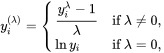

3. yeo-johnson Î≥ÄÌôò

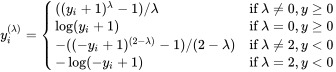

**Î∞ïÏä§ÏΩïÏä§ Î≥ÄÌôò(Box-Cox transformation)**

-> ÏñëÏàòÏù∏ Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎìúÎäî Î∞©Î≤ï

Œª = 0 ÏùºÎïå , Îç∞Ïù¥ÌÑ∞Ïóê ÏûêÏó∞Î°úÍ∑∏Î•º Ï∑®ÌïúÎã§.

Œª ‚â† 0 , Îç∞Ïù¥ÌÑ∞ yÎ•º ŒªÎßåÌÅº Í±∞Îì≠Ï†úÍ≥±Ìïú ÌõÑ 1ÏùÑ Î∫Ä Îí§, ŒªÎ°ú ÎÇòÎààÎã§.‚Äã




\




**Î∞ïÏä§ÏΩïÏä§ Î≥ÄÌôò Í≥ºÏ†ï**

1. Î≥ÄÌôò ÌååÎùºÎØ∏ÌÑ∞(Œª) Ï∂îÏ†ï: Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú Î≥ÄÌôò ÌååÎùºÎØ∏ÌÑ∞(Œª)Î•º ÏµúÏ†ÅÌôîÌïúÎã§. Î≥¥ÌÜµ ÏµúÎåÄÏö∞ÎèÑÏ∂îÏ†ïÎ≤ïÏù¥ÎÇò ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
2. Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò


\


**Î∞ïÏä§ÏΩïÏä§ Î≥ÄÌôò ÌïúÍ≥ÑÏ†ê**

Îç∞Ïù¥ÌÑ∞Í∞Ä 0 ÎòêÎäî ÏùåÏàò Í∞íÏùÑ Í∞ÄÏßà Îïå Ï†ÅÏö©ÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ üëâ  Ïó¨Ï°¥Ïä® Î≥ÄÌôò(Yeo-Johnson transformation) ÏÇ¨Ïö©



---


**Ïó¨Ï°¥Ïä® Î≥ÄÌôò(Yeo-Johnson transformation)**

-> Î∞ïÏä§ÏΩïÏä§ Î≥ÄÌôòÏùÑ Î≥¥ÏôÑÌïòÍ≥† ÏùåÏàò Í∞íÏùÑ Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÌôïÏû•Îêú Î≥ÄÌôòÏù¥Îã§.

\
Îç∞Ïù¥ÌÑ∞Í∞Ä 0 ÎòêÎäî ÏñëÏàòÏùº Í≤ΩÏö∞,

Œª= 0 Ïù∏ Í≤ΩÏö∞: Îç∞Ïù¥ÌÑ∞ yÏóê 1ÏùÑ ÎçîÌïòÍ≥† ŒªÎßåÌÅº Í±∞Îì≠Ï†úÍ≥±Ìïú ÌõÑ 1ÏùÑ Î∫Ä Îí§, ŒªÎ°ú ÎÇòÎààÎã§.
Œª ‚â† 0 Ïù∏ Í≤ΩÏö∞: Îç∞Ïù¥ÌÑ∞ yÏóê 1ÏùÑ ÎçîÌïú ÌõÑ Î°úÍ∑∏Î•º Ï∑®ÌïúÎã§.

\
Îç∞Ïù¥ÌÑ∞Í∞Ä ÏùåÏàòÏùº Í≤ΩÏö∞,

Œª ‚â† 2 Ïù∏ Í≤ΩÏö∞: Îç∞Ïù¥ÌÑ∞ yÏóê 1ÏùÑ ÎπºÍ≥† 2‚àíŒª ÎßåÌÅº Í±∞Îì≠Ï†úÍ≥±Ìïú ÌõÑ 1ÏùÑ Î∫Ä Îí§, 2‚àíŒªÎ°ú ÎÇòÎààÎã§.
Œª = 2 Ïù∏ Í≤ΩÏö∞: Îç∞Ïù¥ÌÑ∞ yÏóê 1ÏùÑ ÎπºÍ≥† Î°úÍ∑∏Î•º Ï∑®ÌïúÎã§.


In [26]:
from scipy.special import boxcox1p
from sklearn.preprocessing import PowerTransformer


high_skew = skew_features
high_skew_index = high_skew.index
print('the data before Log Transformation: \n', all_df[high_skew_index].head())


# Î≥ÄÌôòÍ∏∞ Ï†ïÏùò
pt = PowerTransformer(method='yeo-johnson', standardize=False)
all_df[high_skew_index] = pt.fit_transform(all_df[high_skew_index])

print('the data after Log Transformation: \n', all_df[high_skew_index].head())

the data before Log Transformation: 
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  ...  BedroomAbvGr  \
0         0.0              0            0           0.0  ...             3   
1         0.0              0            0           1.0  ...             3   
2         0.0              0            0           0.0  ...             3   
3         0.0            272            0           0.0  ...             3   
4         0.0              0            0           0.0  ...             4   

   GarageArea  OverallQual  MoSold  FullBath  YrSold  Garage

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [27]:
all_df['TotalBsmtSF']

0       213.753354
1       286.734160
2       225.745827
3       194.559991
4       266.391580
           ...    
2912    152.028377
2913    152.028377
2914    280.180254
2915    224.258286
2916    239.723344
Name: TotalBsmtSF, Length: 2917, dtype: float64

# ÎèÑÏ∂ú Î≥ÄÏàò ÏÉùÏÑ±

In [28]:
# ÏßëÏùò Ï†ÑÏ≤¥ÌÅ¨Í∏∞Î•º ÏùòÎØ∏ ÌïòÎäî 'TotalSF' Î≥ÄÏàòÎ•º ÏÉùÏÑ±
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
print(all_df.shape)

(2917, 70)


In [29]:
# ÏßëÏùò Ï†ÑÏ≤¥ ÌôîÏû•Ïã§ Í∞úÏàò Total_Bathrooms' Î≥ÄÏàò ÏÉùÏÑ±
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) +
                             all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))

#ÏßëÏùò ÌòÑÍ¥Ä Í∞úÏàò 'Total_porch_sf' Î≥ÄÏàò ÏÉùÏÑ±
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] +
                            all_df['EnclosedPorch'] + all_df['ScreenPorch'])

all_df = all_df.drop(['FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)

print(all_df.shape)

(2917, 64)


In [30]:
# Ïó∞ÎèÑÏôÄ Í¥ÄÎ†®ÏûàÎäî Î≥ÄÏàò Ï∂îÏ∂ú
num_all_vars = list(train.select_dtypes(include = [np.number]))
year_feature = []
for var in num_all_vars:
    if 'Yr' in var:
        year_feature.append(var)
    elif 'Year' in var:
        year_feature.append(var)
    else:
        print(var, "is not related with year")

print(year_feature)

MSSubClass is not related with year
LotFrontage is not related with year
LotArea is not related with year
OverallQual is not related with year
OverallCond is not related with year
MasVnrArea is not related with year
BsmtFinSF1 is not related with year
BsmtFinSF2 is not related with year
BsmtUnfSF is not related with year
TotalBsmtSF is not related with year
1stFlrSF is not related with year
2ndFlrSF is not related with year
LowQualFinSF is not related with year
GrLivArea is not related with year
BsmtFullBath is not related with year
BsmtHalfBath is not related with year
FullBath is not related with year
HalfBath is not related with year
BedroomAbvGr is not related with year
KitchenAbvGr is not related with year
TotRmsAbvGrd is not related with year
Fireplaces is not related with year
GarageCars is not related with year
GarageArea is not related with year
WoodDeckSF is not related with year
OpenPorchSF is not related with year
EnclosedPorch is not related with year
3SsnPorch is not rela

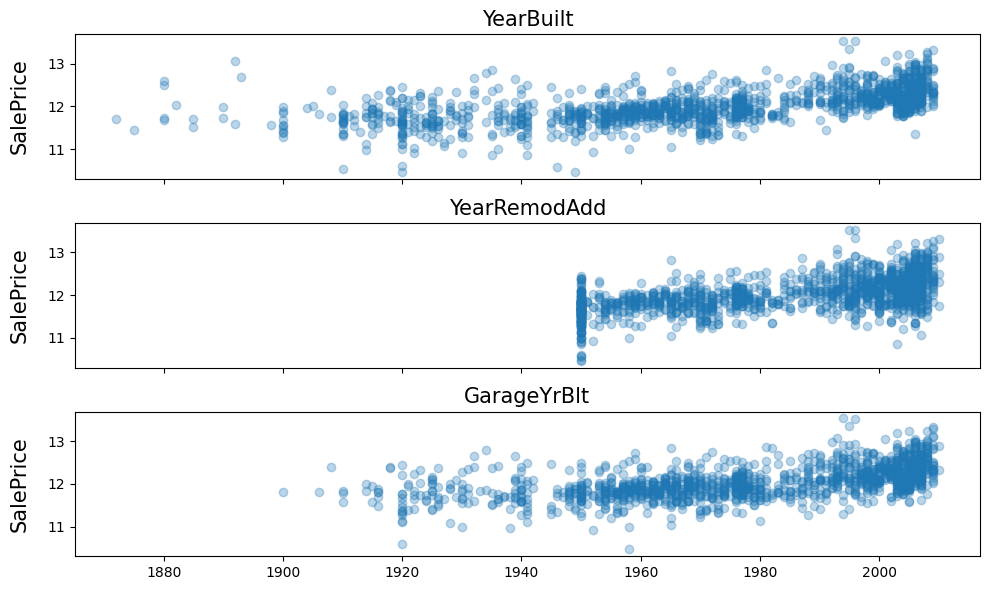

In [31]:
# Ïó∞ÎèÑ Í¥ÄÎ†® Î≥ÄÏàòÏôÄ SalePriceÎ•º Ïó∞Í¥ÄÏßÄÏñ¥ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
fig, ax = plt.subplots(3 , 1, figsize=(10,6), sharex = True, sharey=True) # subplotÏù¥ ÏïÑÎãå subplotsÎ•º Ïç®ÏïºÌï®
for i, var in enumerate(year_feature):
    if var != 'YrSold':
        ax[i].scatter(train[var], y , alpha =0.3) # SalePriceÍ∞Ä trainÏóêÎßå ÏûàÏñ¥ÏÑú train Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©
        ax[i].set_title(f'{var}', size = 15)
        ax[i].set_ylabel('SalePrice', size = 15, labelpad = 12.5)

plt.tight_layout()
plt.show()

2000ÎÖÑÎåÄ Ïò¨ÏàòÎ°ù SalePriceÏùò Í∞ÄÍ≤©Ïù¥ Î™®Îëê Ïö∞Ï∏°ÏúºÎ°ú ÏÉÅÌñ•Ìï®ÏùÑ Ïïå Ïàò ÏûàÎã§.

Î≥¥ÌÜµ Î¶¨Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÎ©¥ Ï£ºÌÉù Í∞ÄÍ≤©Ïùò Ìò∏Í∞ÄÎ•º ÎÜíÏó¨ Î∂ÄÎ•º Ïàò ÏûàÏñ¥ Î¶¨Î™®Îç∏ÎßÅÎßå Í∏∞Ï§ÄÏÇºÍ≥† ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎäî ÏÇ≠Ï†ú

In [32]:
# Î¶¨Î™®Îç∏ÎßÅÏùÑ Í∏∞Ï§ÄÏÇºÍ≥† ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎäî ÏÇ≠Ï†ú
all_df.drop(['YearBuilt','GarageYrBlt'], axis = 1, inplace = True)
print(all_df.shape)

(2917, 62)


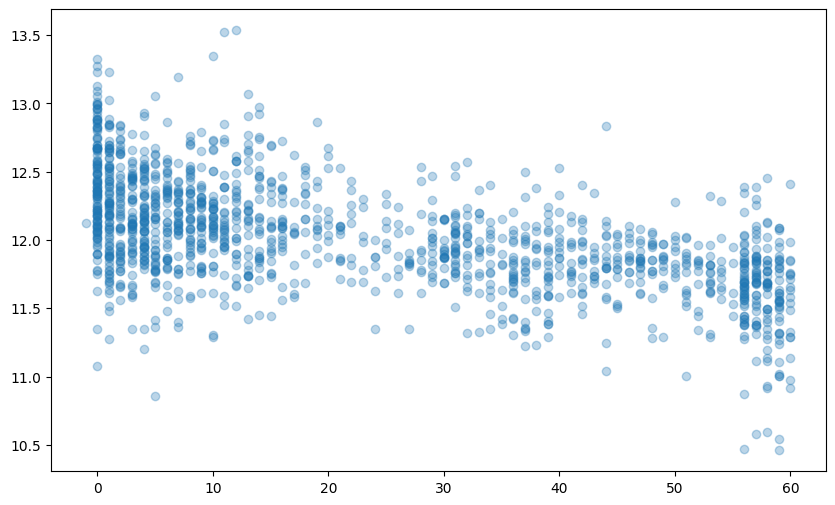

In [33]:
#YrSoldÏôÄ YearRemodAdd Ïó∞ÎèÑ Ï∞®Ïù¥ Í∞íÏóê ÎåÄÌïú Î≥ÄÏàò YearSinceRemodelÏùÑ ÎßåÎì† ÌõÑ ÏãúÍ∞ÅÌôî ÏßÑÌñâ
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)
fig.show()

Ï∞®Ïù¥Í∞Ä Ïª§ÏßàÏàòÎ°ù SalePrice Í∞íÏù¥ ÌïòÏñëÌï®ÏùÑ Ïïå Ïàò ÏûàÎã§

In [34]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold','YearRemodAdd'], axis = 1)
print(all_df.shape)

(2917, 61)


# ÎçîÎØ∏Î≥ÄÏàò ÏÉùÏÑ±

In [35]:
all_df['PoolArea'].value_counts()
# ÌôïÏù∏ ÌõÑ 0Î≥¥Îã§ ÌÅ¨Î©¥ 1Î°ú, 0ÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïúÎã§

PoolArea
-0.00000    2904
 0.02738      13
Name: count, dtype: int64

In [36]:
# 0 Î≥¥Îã§ ÌÅ¨Î©¥ 1, 0Ïù¥Î©¥ 0ÏúºÎ°ú Î≥ÄÌôòÌïòÎäî ÏÇ¨Ïö©Ïûê Ìï®Ïàò Ï†ÄÏúºÏù¥
def count_dummy(x):
    if x>0:
        return 1
    else:
        return 0

all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

PoolArea
0    2904
1      13
Name: count, dtype: int64

In [37]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

GarageArea
1    2760
0     157
Name: count, dtype: int64

In [38]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

Fireplaces
1    1497
0    1420
Name: count, dtype: int64

In [39]:
#Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïõê Ìï´ Ïù∏ÏΩîÎî©
all_df = pd.get_dummies(all_df).reset_index(drop=True)
print(all_df.shape)

(2917, 254)


# Î®∏Ïã†Îü¨Îãù Î™®Ìòï ÌïôÏäµ Î∞è ÌèâÍ∞Ä

In [40]:
X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1458, 254), (1458,), (1459, 254))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1166, 254), (292, 254), (1166,), (292,))

In [42]:
# 5-fold ÍµêÏ∞®Í≤ÄÏ¶ù
cv = KFold(n_splits = 5, random_state=0, shuffle=True)

# ÌöåÍ∑Ä Î™®Ìòï ÌèâÍ∞Ä - RMSE

ÌöåÍ∑Ä Î™®ÌòïÏóêÏÑú ÌèâÍ∞Ä ÏßÄÌëúÎäî Ïò§Î•ò(Error)

*Error = True value - Predicted Value*


---


**Ïò§Ï∞®Î•º ÌôúÏö©Ìïú ÌèâÍ∞Ä Î∞©Î≤ï**

1. MAE(Mean Abolute Error)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


\

2. MSE(Mean Squared Error)

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

\

3. RMSE(Root MEan Squared Error)

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$




---
Ï∫êÍ∏ÄÏóêÏÑúÎäî RMSEÎ•º Ï£ºÎ°ú ÌèâÍ∞Ä ÏßÄÌëúÎ°ú ÏÇ¨Ïö©Ìï®

-> 1. Îß§Ïö∞ ÏâΩÍ≤å Ï†ëÍ∑ºÏù¥ Í∞ÄÎä•Ìï®. Ïò§Ï∞®Ïùò Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùÄ Î™®ÌòïÏù¥ÏßÄÎßå Ï†àÎåÄÏ†ÅÏù∏ Í∏∞Ï§ÄÏù¥ ÏóÜÏñ¥ Îã§ÏñëÌïú Î®∏Ïã†Îü¨Îãù Î∞è ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ Î∞òÎ≥µÌïòÏó¨ ÏµúÎåÄÌïú ÎÇÆÏõåÏïº Ìï®.

-> 2. Ïò§Ï∞®Í∞Ä ÌÅ¨Î©¥ RMSEÍ∞íÏù¥ ÌÅ¨Í≤å ÌùîÎì§Î¶º. Ï¶â Ï†úÎåÄÎ°ú ÏòàÏ∏°ÎêòÏßÄ ÏïäÏùÄ Í≤ÉÏùÑ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

In [43]:
#RMSEÎäî Î≥ÑÎèÑÏùò Ìï®ÏàòÍ∞Ä ÎÇ¥Ïû•ÎêòÏßÄ ÏïäÏïÑ MSE Î™®ÎìàÏùÑ ÌôúÏö©Ìï¥ ÏÇ¨Ïö©Ïûê Ìï®ÏàòÎ°ú Ï†ïÏùòÌïúÎã§
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [44]:
# ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ Ìï† ÎïåÎßàÎã§ RMSEÎ•º ÌôïÏù∏ÌïòÎäî ÏÇ¨Ïö©Ïûê Ìï®Ïàò Ï†ïÏùò
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


def cv_rmse(model, n_folds = 5):
    cv = KFold(n_splits = n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list:',np.round(rmse_list, 4))
    print('CV RMSE value mean:',np.round(np.mean(rmse_list), 4))
    return rmse_list


# Í∞ÅÍ∞ÅÏùò RMSEÎ•º Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôòÎ∞õÏùÄ Îí§ ÎîïÏÖîÎÑàÎ¶¨ rmse_scoresÏóê ÏûÖÎ†•
n_folds = 4 # n_folds = 5Ïùº ÎïåÎ≥¥Îã§ 4Ïùº Îïå Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÍ≤å ÎÇòÏôÄÏÑú Ïó¨Í∏∞ÏÑúÎäî 4Î°ú ÏßÄÏ†ïÌïòÏòÄÏùå
rmse_scores = {}
lr_model=LinearRegression()

score = cv_rmse(lr_model, n_folds)
print('linear regression-mean: {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))
rmse_scores['LinearRegression'] = (score.mean(), score.std()) # rmse_score ÎîïÏÖîÎÑàÎ¶¨Ïóê Í∞í Ï∂îÍ∞Ä

CV RMSE value list: [0.1693 0.5867 0.1486 0.1221]
CV RMSE value mean: 0.2567
linear regression-mean: 0.2567 (std: 0.1913)


# ÏµúÏ¢Ö ÏòàÏ∏° Ï†úÏ∂ú

In [45]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

lr_model_fit = lr_model.fit(X,y)
final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test))) # np.log1p Î≥ÄÌôòÏùÑ ÌïòÏòÄÍ∏∞Ïóê ÏõêÎûò Í∞íÏúºÎ°ú ÎèåÎ¶¥ Îïå np.expm1ÏùÑ ÏÇ¨Ïö©ÌïúÎã§ // np.floorÎäî ÏÜåÏàòÏ†ê Ïù¥ÌïòÎäî ÌëúÏãúÌïòÏßÄ ÏïäÏùå Ïã§Ï†ú Îß§Îß§ Í∞ÄÍ≤©ÏùÄ ÏÜåÏàòÏ†ê Ïù¥ÌïòÎäî ÌëúÏãúÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏
print(final_preds)

[114715. 162538. 189681. ... 176335. 114009. 217454.]


In [46]:
submission = pd.read_csv('/content/sample_submission.csv')
submission.iloc[:,1] = final_preds # Ïã§Ï†ú ÏòàÏ∏°Í∞íÏù∏ final_preds Ï∂îÍ∞Ä
print(submission.head())
submission.to_csv('1st_regression.csv', index = False)

     Id  SalePrice
0  1461   114715.0
1  1462   162538.0
2  1463   189681.0
3  1464   200371.0
4  1465   196354.0


# Î™®Ìòï ÏïåÍ≥†Î¶¨Ï¶ò Ï∂îÍ∞Ä

In [47]:
# Î™®ÌòïÏùò ÏÑ±Îä• Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ Decision Tree, Random Forest, GBM Î™®Ìòï Ï∂îÍ∞Ä
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#LinearRegression
lr_model = LinearRegression()

#Tree Decision
tree_model = DecisionTreeRegressor()

#Random Foreset Regressor
rf_model = RandomForestRegressor()

#Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()

In [48]:
# Decision Tree, Random Forest, GBM Î™®ÌòïÏùÑ Í∞ÅÍ∞Å cv_rmseÏóê Ï†ÅÏö©Ìï¥ Í∞íÏùÑ Íµ¨ÌïúÎã§
score = cv_rmse(tree_model, n_folds = 5)
print("Decision Tree Regressor-mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Decision Tree Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.2337 0.2056 0.2132 0.2082 0.2126]
CV RMSE value mean: 0.2147
Decision Tree Regressor-mean: 0.2147 (std: 0.0099)


In [49]:
score = cv_rmse(rf_model, n_folds = 5)
print("RandomForeset Regressor-mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['RandomForest Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.1577 0.147  0.1342 0.1625 0.1355]
CV RMSE value mean: 0.1474
RandomForeset Regressor-mean: 0.1474 (std: 0.0114)


In [50]:
score = cv_rmse(gbr_model, n_folds = 5)
print("Gradient Boosting Regressor-mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Gradient Boosting Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.1372 0.1354 0.1229 0.1359 0.1233]
CV RMSE value mean: 0.1309
Gradient Boosting Regressor-mean: 0.1309 (std: 0.0064)


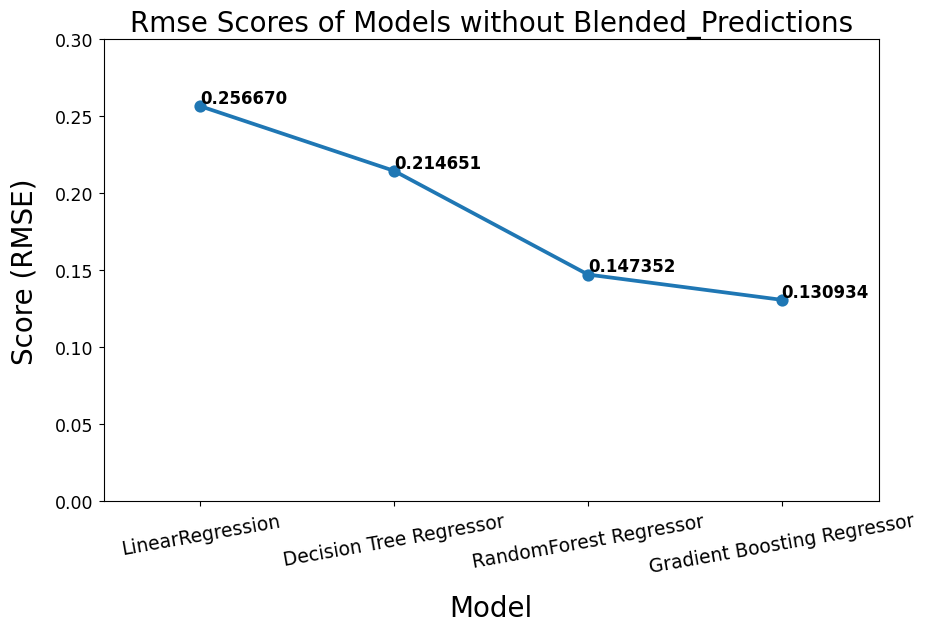

In [51]:
#ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Ïñ¥Îñ§ Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Í∞ÄÏû• ÎÇÆÏùÄ RMSEÎ•º Í∏∞Î°ùÌïòÎäîÏßÄ ÌôïÏù∏
fig, ax = plt.subplots(figsize=(10,6))

ax=sns.pointplot(x=list(rmse_scores.keys()), y = [score[0] for score in rmse_scores.values()], ax=ax)
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0]+0.002, '{:6f}'.format(score[0]), horizontalalignment = 'left', size = 'large', color = 'black', weight = 'semibold')

ax.set_ylabel('Score (RMSE)', size = 20, labelpad=12.5)
ax.set_xlabel('Model', size = 20, labelpad=12.5)
ax.tick_params(axis = 'x', labelsize = 13.5, rotation = 10)
ax.tick_params(axis = 'y', labelsize = 12.5)
ax.set_ylim(0, 0.3)
ax.set_title("Rmse Scores of Models without Blended_Predictions", size = 20)
fig.show()

# Blending - Í∞ÄÏ§ëÏπòÎ•º Î™®ÌòïÏóê Î∂ÄÍ≥º

In [52]:
# Blending Ï†ÅÏö©ÌïòÍ∏∞

lr_model_fit = lr_model.fit(X, y)
tree_model_fit = tree_model.fit(X, y)
rf_model_fit = rf_model.fit(X, y)
gbr_model_fit = gbr_model.fit(X, y)


# Blending Ï†ÅÏö© ÏÇ¨Ïö©Ïûê Ìï®Ïàò Ï†ïÏùò

def blended_learning_predictions(X):
    blended_score=(0.3*lr_model_fit.predict(X))+\
    (0.2*tree_model_fit.predict(X))+\
    (0.2*rf_model_fit.predict(X))+\
    (0.3*gbr_model_fit.predict(X))
    return blended_score

In [53]:
blended_score = rmse(y, blended_learning_predictions(X))
rmse_scores['blended']= (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.05946215097607764


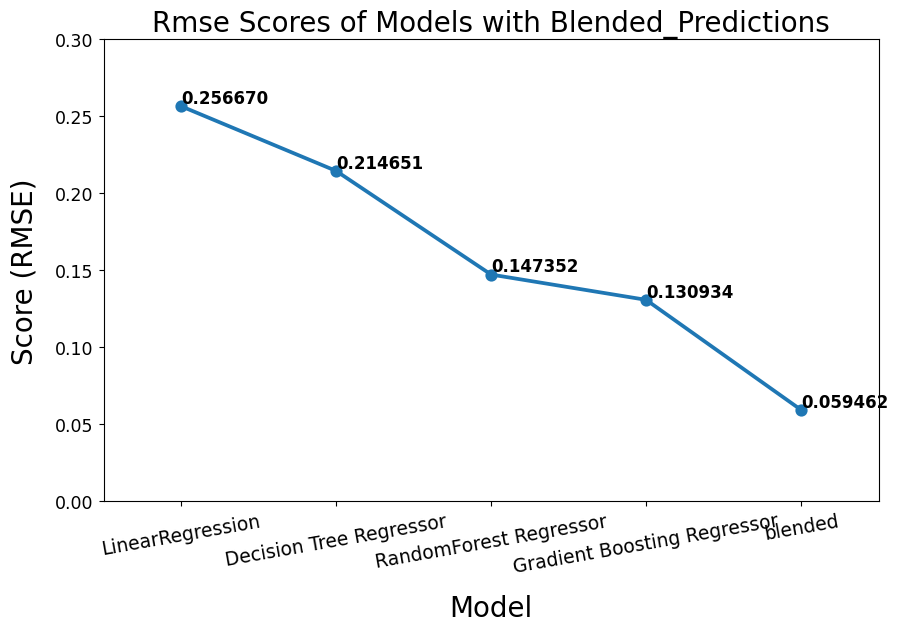

In [54]:
#ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Ïñ¥Îñ§ Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Í∞ÄÏû• ÎÇÆÏùÄ RMSEÎ•º Í∏∞Î°ùÌïòÎäîÏßÄ ÌôïÏù∏
fig, ax = plt.subplots(figsize=(10,6))

ax=sns.pointplot(x=list(rmse_scores.keys()), y = [score[0] for score in rmse_scores.values()], ax=ax)
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0]+0.002, '{:6f}'.format(score[0]), horizontalalignment = 'left', size = 'large', color = 'black', weight = 'semibold')

ax.set_ylabel('Score (RMSE)', size = 20, labelpad=12.5)
ax.set_xlabel('Model', size = 20, labelpad=12.5)
ax.tick_params(axis = 'x', labelsize = 13.5, rotation = 10)
ax.tick_params(axis = 'y', labelsize = 12.5)
ax.set_ylim(0, 0.3)
ax.set_title("Rmse Scores of Models with Blended_Predictions", size = 20)
fig.show()

# ÏßÑÏßú ÏµúÏ¢Ö ÏòàÏ∏° Ï†úÏ∂ú

In [55]:
submission = pd.read_csv('/content/sample_submission.csv')
submission.iloc[:,1] = np.floor (np.expm1(blended_learning_predictions(X_test))) # ÏàòÏ†ïÎêú ÏòàÏ∏°Í∞í Ï∂îÍ∞Ä
print(submission.head())
submission.to_csv('2nd_regression.csv', index = False)

     Id  SalePrice
0  1461   117341.0
1  1462   155328.0
2  1463   187315.0
3  1464   193092.0
4  1465   195762.0
